In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [185]:
years = range(2013, 2017)
head = 'data/Beijing_'
tail = '_HourlyPM25.csv'
months = range(1, 13)
months_spell = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

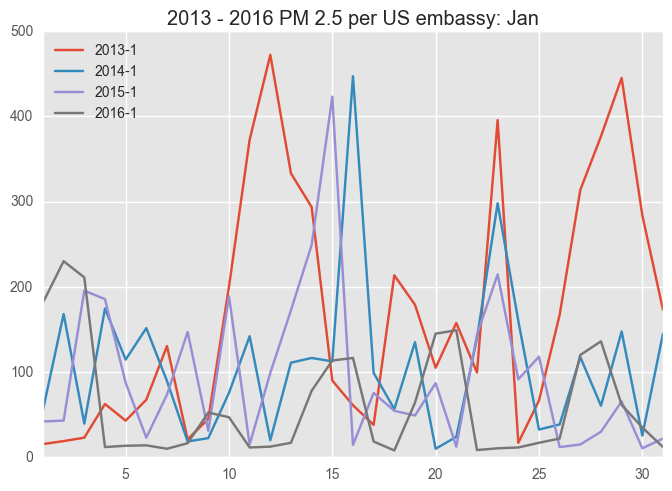

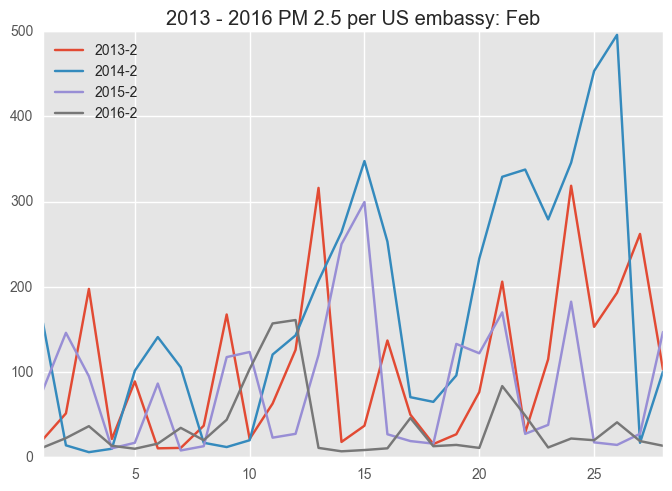

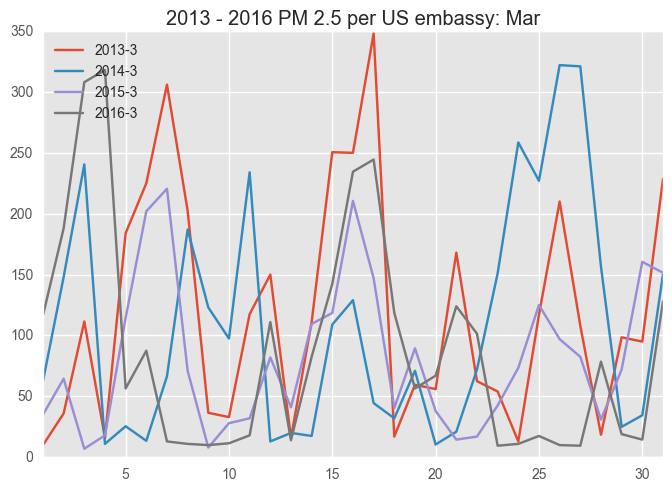

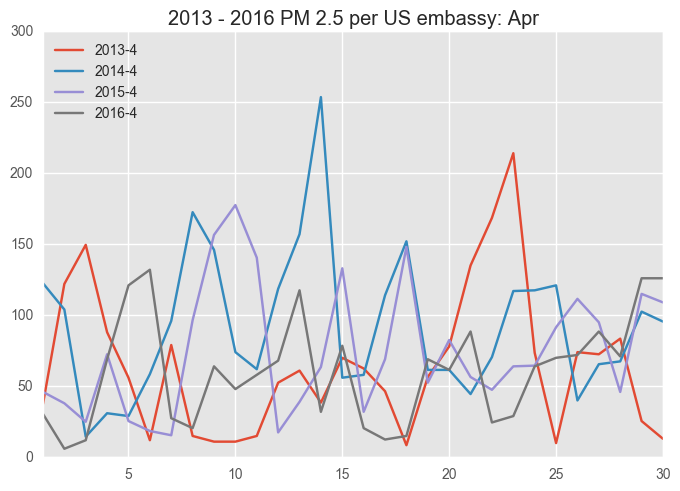

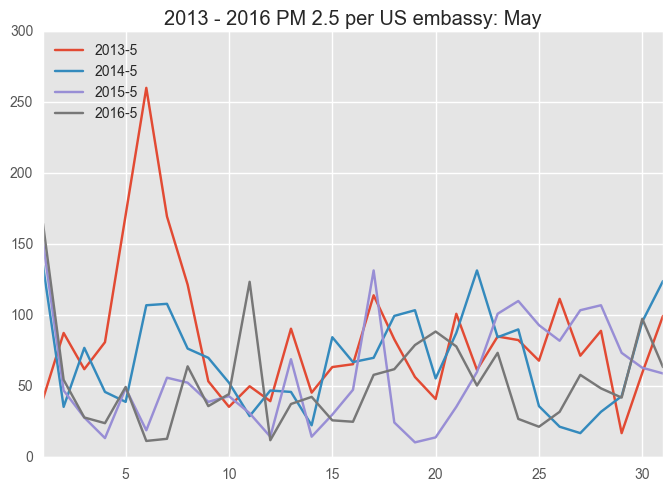

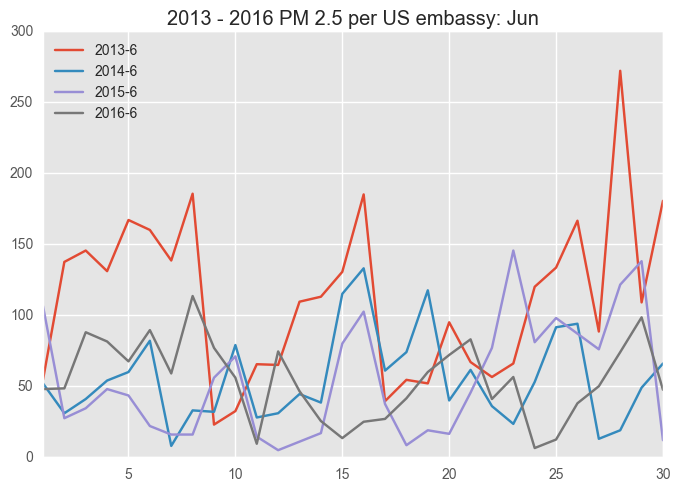

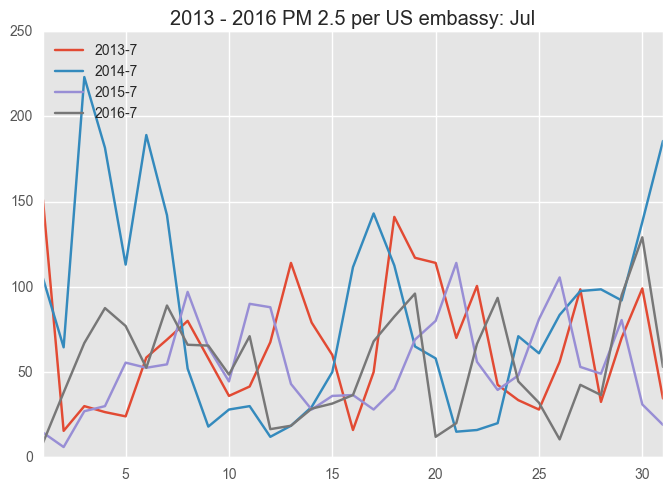

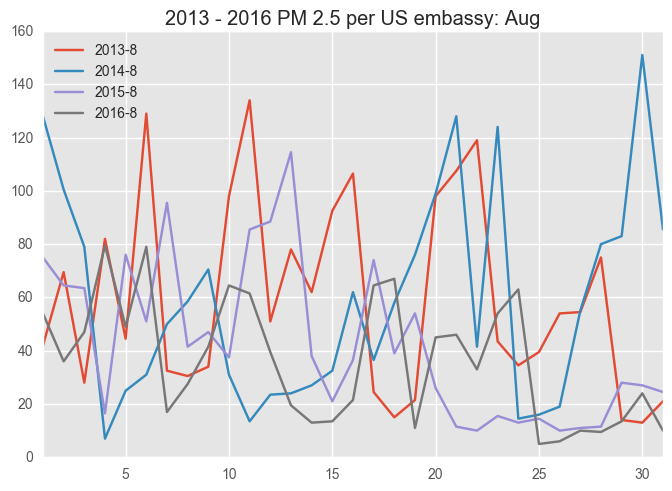

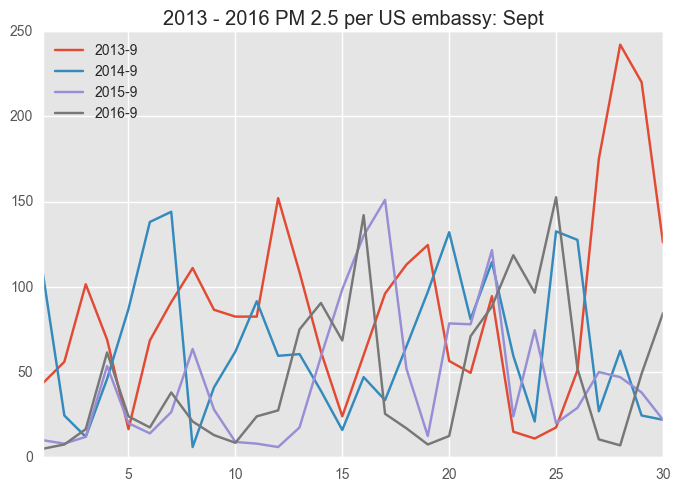

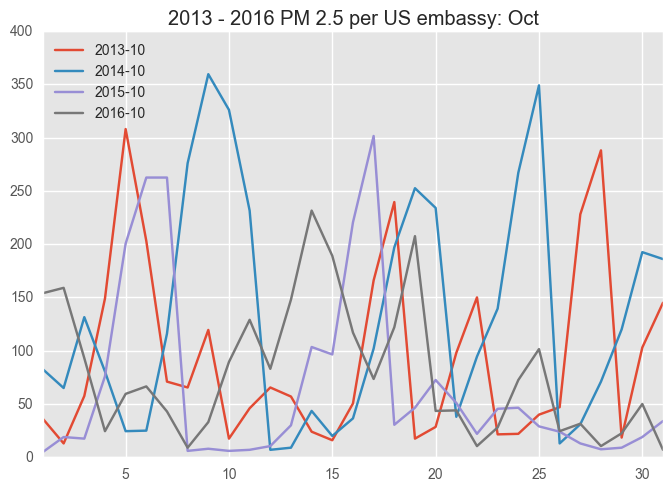

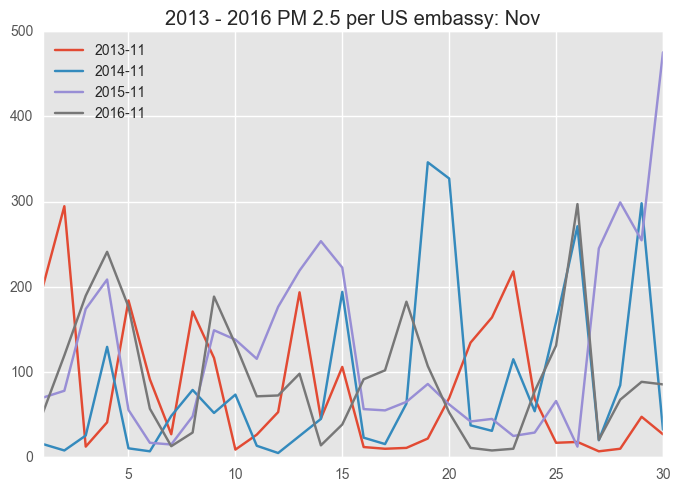

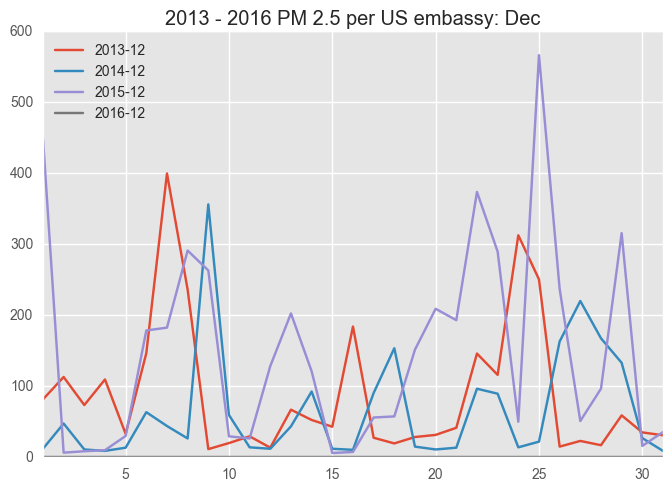

In [ ]:
for month in months:
    output = pd.DataFrame(index = range(1, 32))
    for year in years:
        data = pd.read_csv(head + str(year) + tail, encoding = 'cp1252', skiprows = 3)
        data = data[data['QC Name'] != 'Missing']
        data_month = data[data['Month'] == month].pivot_table(index = 'Day', values = 'Value', aggfunc = np.median)
        output[str(year) + '-' + str(month)] = data_month
        if (year == 2016 and month == 12): output['2016-12'] = 0
        output = output.dropna()
    # output image
    output.plot.line()
    plt.legend(loc = 'upper left')
    plt.title(str(years[0]) + ' - ' + str(years[-1]) + ' PM 2.5 per US embassy: ' + months_spell[month -1] )
    plt.savefig('output/' + months_spell[month-1] + '.png')
    plt.show()

In [ ]:
output = pd.DataFrame(index = range(1, 13), columns = years)
#print(output)
for year in years:
    data = pd.read_csv(head + str(year) + tail, encoding = 'cp1252', skiprows = 3)
    data = data[data['QC Name'] != 'Missing']
    for month in months:
        data_month = data[data['Month'] == month].pivot_table(index = 'Month', values = 'Value', aggfunc = np.median)
        data_day = data[data['Month'] == month].pivot_table(index = 'Day', values = 'Value', aggfunc = np.median)
        try:
            output.ix[month, year] = int(data_month.values[0])
        except:
            output.ix[month, year] = 0
#        print(np.std(data_day))
output.plot.line()  
plt.title('2013 - 2016 Beijing PM2.5 Monthly Mean - US Embassy')
plt.xticks(months)
plt.savefig('output/2013_2016_summary.png')
plt.show()   